# NYPD Motor Vehicle Collision Data<a id='Top'></a>

### Overview

The "Motor Vehicle Collisions - Crashes" dataset available through New York City's Open Data program contains information about reported vehicle crashes in NYC. Each row contains details on a single crash event. 

The data contains records from 2012 to today, with data updated on a daily basis. At the time of this writing, there are 1.61 million rows, each row representing a crash event, and 29 columns. 

In this notebook we will analyze this data as follows:

1. [Importing](#Importing)
2. [Understanding](#Understanding)
    - [Column Contents](#column_contents)
    - [Descriptive Statistics](#descriptive_statistics)
    - [Columns Missing Data](#empty)
3. [Transforming](#Transforming)
    - [Dropping Columns](#Drop)
    - [Renaming Data](#Renaming)
    - [Redundant Columns](#Redundant)
    - [Data Types](#data_type)
    - [Categorizing](#categorizing)
4. [Analyzing](#Analyzing)
5. [Statistical Analysis](#statistical_analysis)
    - [ANOVA](#anova)
    - [2 Sample T-Test](#2ttest)
    - [Chi-Square](#chi-sq)
6. [Visualizing](#Visualizations)
    - [Number of Deaths by Borough](#Fataities_by_borough) 
    - [Number of Crashes by Hour](#Crashes_by_hour)
    - [Number of Accidents by Season](#accidents_by_season)
    - [Fatal Car Crash Locations](#car_crash_locations)
    - [Contributing Factors to Crash Fatalities](#Factor_Bar_Plot)
    - [Fatalities to Pedestrians vs Cyclists vs Motorists](#Fataity_Grouped_Series)
    - [Fatal Crash Frequency Over Time](#Fatality_Time_Scatterplot)
    - [Crash Factor Percentages in Queens](#queens_crash_causes)
7. [End of Document](#Bottom)


* The dataset can be found by following this link: https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions-Crashes/h9gi-nx95

### Importing the Data<a id='Importing'></a>

Let's begin by importing a few libraries we will use later in the notebook, and then bring the first two million rows of NYPD Motor Vehicle Collision Data using pandas. We are over-estimating the number of rows, to leave room for more data if this is run in the future.
<br><div style="text-align: right">[Begining of the page](#Top)</div>

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import sys
from IPython.core.display import display, HTML

In [2]:
datanyc = pd.read_csv("https://data.cityofnewyork.us/resource/h9gi-nx95.csv?$limit=2000000", low_memory=False)

And let's pull up the data dictionary supplied by the Open Data website for reference.

In [3]:
data_dict = pd.read_excel("https://data.cityofnewyork.us/api/views/h9gi-nx95/files/2e58023a-21a6-4c76-b9e8-0101bf7509ca?download=true&filename=MVCollisionsDataDictionary.xlsx",
                         sheet_name='Column Info',  header=1)
data_dict.head()

,Table Name,Column Name,Column Description,Primary Key or Foreign Key,"Additional Notes (where applicable, includes the range of possible values, units of measure, how to interpret null/zero values, whether there are specific relationships between columns, and/or information on column source)"
0,MV-Collisions - Crash,UNIQUE_ID,Unique record code generated by system,Primary Key for the crash table,NaN
1,MV-Collisions - Crash,ACCIDENT_DATE,Occurrence date of collision,NaN,NaN
2,MV-Collisions - Crash,ACCIDENT_TIME,Occurrence time of collision,NaN,NaN
3,MV-Collisions - Crash,BOROUGH,Borough where collision occurred,NaN,NaN
4,MV-Collisions - Crash,ZIP CODE,Postal code of incident occurrence,NaN,NaN


### Understanding the Data <a id='Understanding'></a>
Let's look at the first few rows of the dataset. <br><div style="text-align: right">[Begining of the page](#Top)</div>

In [4]:
pd.set_option('display.max_columns', None) # This allows us to view all columns in a dataframe when called
pd.set_option('display.max_rows', 200) # This returns 200 rows at max to prevent accidents when writing code
datanyc.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2019-10-16T00:00:00.000,7:20,NaN,NaN,40.742540,-73.82631,POINT (-73.82631 40.74254),LONG ISLAND EXPRESSWAY,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4223970,Sedan,Van,NaN,NaN,NaN
1,2019-11-05T00:00:00.000,15:23,NaN,NaN,40.853714,-73.92681,POINT (-73.92681 40.853714),WEST 190 STREET,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4236180,Taxi,NaN,NaN,NaN,NaN
2,2019-10-25T00:00:00.000,17:42,MANHATTAN,10009,40.725200,-73.98706,POINT (-73.98706 40.7252),1 AVENUE,EAST 4 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4230640,Bus,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
3,2019-11-08T00:00:00.000,8:00,NaN,NaN,NaN,NaN,NaN,149 STREET,CROSS ISLAND PARKWAY,NaN,1.0,0.0,0,0,0,0,1,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,4237510,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
4,2019-10-16T00:00:00.000,17:30,NaN,NaN,40.662060,-73.94277,POINT (-73.94277 40.66206),EAST NEW YORK AVENUE,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4226118,Sedan,Sedan,NaN,NaN,NaN


... And get overall information about the contents of the data. <a id='column_contents'></a>

In [5]:
pd.options.display.max_info_rows = 2000000
datanyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618510 entries, 0 to 1618509
Data columns (total 29 columns):
crash_date                       1618510 non-null object
crash_time                       1618510 non-null object
borough                          1127104 non-null object
zip_code                         1126907 non-null object
latitude                         1421111 non-null float64
longitude                        1421111 non-null float64
location                         1421111 non-null object
on_street_name                   1300809 non-null object
off_street_name                  1074700 non-null object
cross_street_name                225536 non-null object
number_of_persons_injured        1618493 non-null float64
number_of_persons_killed         1618479 non-null float64
number_of_pedestrians_injured    1618510 non-null int64
number_of_pedestrians_killed     1618510 non-null int64
number_of_cyclist_injured        1618510 non-null int64
number_of_cyclist_killed        

Each column should contain approxamitely 1.6 million values, though some columns have considerably fewer entries. Let's find the percentage of the missing values and see which columns have the most amount of missing values. To do so we will get a mean of the missing values and then round it to the second decimal.

In [6]:
pd.set_option('display.max_columns', 29)
datanyc.isnull().mean().round(4) * 100

crash_date                        0.00
crash_time                        0.00
borough                          30.36
zip_code                         30.37
latitude                         12.20
longitude                        12.20
location                         12.20
on_street_name                   19.63
off_street_name                  33.60
cross_street_name                86.07
number_of_persons_injured         0.00
number_of_persons_killed          0.00
number_of_pedestrians_injured     0.00
number_of_pedestrians_killed      0.00
number_of_cyclist_injured         0.00
number_of_cyclist_killed          0.00
number_of_motorist_injured        0.00
number_of_motorist_killed         0.00
contributing_factor_vehicle_1     0.26
contributing_factor_vehicle_2    13.47
contributing_factor_vehicle_3    93.53
contributing_factor_vehicle_4    98.65
contributing_factor_vehicle_5    99.66
collision_id                      0.00
vehicle_type_code1                0.34
vehicle_type_code2       

Wow! Some columns have a lot of missing values. 

For some it makes sense. After looking at the data dictionary, `contributing_factor_vehicle_2` or `contributing_factor_vehicle_3` seem like they may be missing because there were no second or third contributing factors to the collision. 

It looks like `contributing_factor_vehicle_3`, `contributing_factor_vehicle_4`, `contributing_factor_vehicle_5` and `vehicle_type_code_3`, `vehicle_type_code_4`, `vehicle_type_code_5` have very few values compared to the others. We will take a closer look at them when we start transforming our data.

For now, we will use the `describe` function to generate some descriptive statistics. This will work on numeric and object series, and may point out any glaring holes in the data. <a id='descriptive_statistics'></a>

In [7]:
datanyc.describe()

,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,collision_id
count,1.421111e+06,1.421111e+06,1.618493e+06,1.618479e+06,1.618510e+06,1.618510e+06,1.618510e+06,1.618510e+06,1.618510e+06,1.618510e+06,1.618510e+06
mean,4.069212e+01,-7.387262e+01,2.627994e-01,1.168381e-03,5.063052e-02,6.320628e-04,2.074624e-02,8.402790e-05,1.915632e-01,4.547392e-04,2.785885e+06
std,1.140949e+00,2.346709e+00,6.601559e-01,3.611347e-02,2.318327e-01,2.571616e-02,1.436950e-01,9.233450e-03,6.225204e-01,2.318027e-02,1.505208e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066880e+01,-7.397720e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.032078e+06
50%,4.072257e+01,-7.392975e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.445380e+06
75%,4.076797e+01,-7.386688e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.850240e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.255897e+06


Obviously averages and standard deviations don't tell a lot about latitude and longitude, but why we don't have full data counts in those columns? The rest of analysis doesn't appear to have obvious problems.

Let's take a look at some of the empty `latitude` column using the `isnull` function. <a id='empty'></a>

In [8]:
datanyc[datanyc['latitude'].isnull()].head(20)

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
3,2019-11-08T00:00:00.000,8:00,NaN,NaN,NaN,NaN,NaN,149 STREET,CROSS ISLAND PARKWAY,NaN,1.0,0.0,0,0,0,0,1,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,4237510,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
5,2019-11-07T00:00:00.000,14:05,BROOKLYN,11236,NaN,NaN,NaN,NaN,NaN,557 EAST 92 STREET,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4241659,E-Bik,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
14,2019-10-23T00:00:00.000,18:43,NaN,NaN,NaN,NaN,NaN,WILLIS AVE BRIDGE,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,4228437,Station Wagon/Sport Utility Vehicle,Box Truck,NaN,NaN,NaN
16,2019-10-18T00:00:00.000,7:05,NaN,NaN,NaN,NaN,NaN,ROCKAWAY BOULEVARD,VANWYCK EXPRESSWAY,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4225191,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
27,2019-10-23T00:00:00.000,20:00,NaN,NaN,NaN,NaN,NaN,75 STREET,PITKIN AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4228538,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
43,2019-10-25T00:00:00.000,18:00,BROOKLYN,11212,NaN,NaN,NaN,NaN,NaN,514 THOMAS S BOYLAND STREET,2.0,0.0,0,0,0,0,2,0,Backing Unsafely,Unspecified,NaN,NaN,NaN,4231641,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
49,2019-11-07T00:00:00.000,12:20,BRONX,10453,NaN,NaN,NaN,HALL OF FAME TERRACE,SEDGWICK AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Turning Improperly,NaN,NaN,NaN,4237711,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
65,2019-10-17T00:00:00.000,17:00,NaN,NaN,NaN,NaN,NaN,OCEAN PARKWAY,CHURCH AVENUE,NaN,1.0,0.0,0,0,0,0,1,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4224938,Sedan,Sedan,NaN,NaN,NaN
71,2019-10-17T00:00:00.000,18:34,QUEENS,11354,NaN,NaN,NaN,NaN,NaN,31-10 WHITESTONE EXPRESSWAY,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,NaN,NaN,NaN,4225044,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
73,2019-11-06T00:00:00.000,10:00,QUEENS,11004,NaN,NaN,NaN,UNION TURNPIKE,259 STREET,NaN,0.0,0.0,0,0,0,0,0,0,View Obstructed/Limited,Unspecified,NaN,NaN,NaN,4236462,Box Truck,Sedan,NaN,NaN,NaN


Seems like those rows have valid data. We wouldn't delete these rows, as the injury/fatality data may be useful, but we would drop them for location purposes.

If we *really* had some time, we would write/find a program to reverse map the `on_street_name` to the other fields.

For now, we'll pivot to take a closer look at vehicle types.

In [9]:
datanyc['vehicle_type_code1'].value_counts().head(20)

PASSENGER VEHICLE                      715236
SPORT UTILITY / STATION WAGON          313500
Sedan                                  161407
Station Wagon/Sport Utility Vehicle    131000
TAXI                                    50670
VAN                                     26540
OTHER                                   23982
PICK-UP TRUCK                           23069
UNKNOWN                                 19929
Taxi                                    16745
SMALL COM VEH(4 TIRES)                  14559
LARGE COM VEH(6 OR MORE TIRES)          14527
BUS                                     14057
Pick-up Truck                           10836
LIVERY VEHICLE                          10481
Box Truck                                8429
Bus                                      6955
MOTORCYCLE                               6536
BICYCLE                                  5568
Bike                                     4030
Name: vehicle_type_code1, dtype: int64

In [10]:
datanyc['vehicle_type_code_3'].value_counts().head(20)

PASSENGER VEHICLE                      63655
SPORT UTILITY / STATION WAGON          33161
Sedan                                  10932
Station Wagon/Sport Utility Vehicle     9072
UNKNOWN                                 3285
TAXI                                    3218
PICK-UP TRUCK                           2292
VAN                                     1489
OTHER                                   1108
Taxi                                     695
Pick-up Truck                            610
BICYCLE                                  533
SMALL COM VEH(4 TIRES)                   479
MOTORCYCLE                               464
LARGE COM VEH(6 OR MORE TIRES)           448
LIVERY VEHICLE                           424
BUS                                      403
Box Truck                                202
Bus                                      127
Motorcycle                               101
Name: vehicle_type_code_3, dtype: int64

It looks like these columns were a text entry field, instead of a select field. It also appears that `vehicle_type_code_2`, `vehicle_type_code_3` and `vehicle_type_code_4` have significantly fewer values than `vehicle_type_code_1`. The data dictionary doesn't clarify definitively, but we believe these may represent multiple cars. The relative emptiness of vehicle type codes 1-4 will likely lead us to primarily analyzing `vehicle_type_code_1`.

We believe we have a decent understanding of our data. In the next section we will modify the column names to standardize the dataset, deal with missing values, clean duplications, and generally get our dataset to the point where we can use it confidently.

## Transforming the Data <a id='Transforming'></a>
### What needs attention
####  [Dropping Columns](#Drop)
* Some columns (such as `vehicle_type_code_4`, `contributing_factor_vehicle_5`) are nearly entirely empty. We'll remove those. 
* We will not be using some columns (e.g. `collision_id`, `on_street_name`, `off_street_name`, `cross_street_name`) so we can drop them completely. 


#### [Renaming Data](#Renaming)
* Cleaning and combining duplicate rows
* Renaming some columns
* Correcting misspellings
* Dealing with missing values
* Some dtype changes

#### [Redundant Columns](#Redundant)
* `Latitude` and `longitude` columns seem to be contained in the `location` column. We like keeping the two values separate for now, so we can probably remove `location` later.

#### [Data Types](#data_type)
* The values that we expect to be a 'datetime' type are an 'object' type (`crash_date` and `crash_time` columns). We'll fix those.
* We will change the data type of zip code to string.

#### [Categorizing](#categorizing)
* We are curious to see if collisions go up seasonally, so we'll make a new variable that bins the collisions by Spring (March, April, May), Summer (June, July, August), Fall (September, October, November), and Winter (December, January, February).
<br><div style="text-align: right">[Begining of the page](#Top)</div>

## Dropping Columns  <a id='Drop'></a>
We'll begin by removing some columns, keeping only those missing fewer than 30% of their values. We can also drop some columns we know we're not going to use. Those operations are simple enough that we'll do them all before checking in again on the DataFrame.

In [11]:
clean_nyc = datanyc.dropna(thresh=(0.30 * datanyc.shape[0]), axis=1).copy()

In [12]:
clean_nyc.drop(columns=["collision_id", "on_street_name", "off_street_name"], inplace=True)

Let's take a peek at what 'clean_nyc' looks like now, as far as data types and number of columns (and values in those columns):

In [13]:
clean_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618510 entries, 0 to 1618509
Data columns (total 19 columns):
crash_date                       1618510 non-null object
crash_time                       1618510 non-null object
borough                          1127104 non-null object
zip_code                         1126907 non-null object
latitude                         1421111 non-null float64
longitude                        1421111 non-null float64
location                         1421111 non-null object
number_of_persons_injured        1618493 non-null float64
number_of_persons_killed         1618479 non-null float64
number_of_pedestrians_injured    1618510 non-null int64
number_of_pedestrians_killed     1618510 non-null int64
number_of_cyclist_injured        1618510 non-null int64
number_of_cyclist_killed         1618510 non-null int64
number_of_motorist_injured       1618510 non-null int64
number_of_motorist_killed        1618510 non-null int64
contributing_factor_vehicle_1    1

And what about the percentage of the missing values now?

In [15]:
pd.set_option('display.max_columns', 29)
clean_nyc.isnull().mean().round(4) * 100

crash_date                        0.00
crash_time                        0.00
borough                          30.36
zip_code                         30.37
latitude                         12.20
longitude                        12.20
location                         12.20
number_of_persons_injured         0.00
number_of_persons_killed          0.00
number_of_pedestrians_injured     0.00
number_of_pedestrians_killed      0.00
number_of_cyclist_injured         0.00
number_of_cyclist_killed          0.00
number_of_motorist_injured        0.00
number_of_motorist_killed         0.00
contributing_factor_vehicle_1     0.26
contributing_factor_vehicle_2    13.47
vehicle_type_code1                0.34
vehicle_type_code2               16.54
dtype: float64

So far, so good.

<br><div style="text-align: right">[Transformation Index](#Transforming)</div>
## Correcting Misspellings and Renaming  <a id='Renaming'></a>

We will modify the column names to standardize the dataset using the rename function.

In [16]:
clean_nyc.rename(columns={'vehicle_type_code1':'vehicle_type_code_1',
                        'vehicle_type_code2':'vehicle_type_code_2',
                       }, 
               inplace=True)

Let's take a closer look at `vehicle_type_code_1`.

In [17]:
clean_nyc['vehicle_type_code_1'].value_counts().head(40)

PASSENGER VEHICLE                      715236
SPORT UTILITY / STATION WAGON          313500
Sedan                                  161407
Station Wagon/Sport Utility Vehicle    131000
TAXI                                    50670
VAN                                     26540
OTHER                                   23982
PICK-UP TRUCK                           23069
UNKNOWN                                 19929
Taxi                                    16745
SMALL COM VEH(4 TIRES)                  14559
LARGE COM VEH(6 OR MORE TIRES)          14527
BUS                                     14057
Pick-up Truck                           10836
LIVERY VEHICLE                          10481
Box Truck                                8429
Bus                                      6955
MOTORCYCLE                               6536
BICYCLE                                  5568
Bike                                     4030
Tractor Truck Diesel                     3668
Van                               

It looks like there are misspellings and duplicates. Let's see if we can combine some of the obvious misspellings.

In [18]:
clean_nyc['vehicle_type_code_1'].replace('SPORT UTILITY / STATION WAGON', 'SUV', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Station Wagon/Sport Utility Vehicle', 'SUV', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('TAXI', 'taxi', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Bike', 'BICYCLE', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('VAN', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Motorscooter', 'SCOOTER', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Moped', 'SCOOTER', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('van', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('MOTORCYCLE', 'Motorcycle', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('AMBULANCE', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Refrigerated Van', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('PICK-UP TRUCK', 'Pick-up Truck', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Motorbike', 'Motorcycle', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('AMBUL', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('CAB', 'taxi', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Cab', 'taxi', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('VAN T', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('VAN/T', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('van t', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('VAN', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Ambul', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('AMB', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Ambu', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('ambul', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Ambu', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Fire', 'FIRE TRUCK', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('fire', 'FIRE TRUCK', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('FIRE', 'FIRE TRUCK', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('FIRET', 'FIRE TRUCK', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('FDNY', 'FIRE TRUCK', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Other', 'Unknown', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('BUS', 'Bus', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Box T', 'Box Truck', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('GARBA', 'Garbage or Refuse', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Taxi', 'taxy', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('taxy', 'taxi', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('AM', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('VN', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('CONV', 'Convertible', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Garbage or Refuse', 'Dump', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('OTHER', 'UNKNOWN', inplace=True)
clean_nyc['vehicle_type_code_1'].value_counts().head(50)

PASSENGER VEHICLE                 715236
SUV                               444506
Sedan                             161407
taxi                               67416
UNKNOWN                            43911
Pick-up Truck                      33905
Van                                30450
Bus                                21012
SMALL COM VEH(4 TIRES)             14559
LARGE COM VEH(6 OR MORE TIRES)     14527
LIVERY VEHICLE                     10481
BICYCLE                             9598
Motorcycle                          8695
Box Truck                           8432
Ambulance                           4048
Tractor Truck Diesel                3668
TK                                  2485
BU                                  2229
Dump                                2019
Convertible                         1782
FIRE TRUCK                          1061
DS                                  1006
4 dr sedan                           908
PK                                   854
Flat Bed        

Even in one column we can see how much variation there is. We would suggest that whoever created this dataset turns this from a "fill in the blank" text field to a select field from a predetermined list, to get better data fidelity, and we hope by this point, you can see why.

Now let's look at `contributing_factor_vehicle_1` and `contributing_factor_vehicle_2`.

In [19]:
clean_nyc['contributing_factor_vehicle_1'].unique()

array(['Following Too Closely', 'Unspecified',
       'Driver Inattention/Distraction', 'Failure to Yield Right-of-Way',
       'Driver Inexperience', 'Unsafe Lane Changing', 'Backing Unsafely',
       'Passing Too Closely', 'Other Vehicular',
       'Passing or Lane Usage Improper', 'Alcohol Involvement',
       'Unsafe Speed', 'Pavement Slippery', 'View Obstructed/Limited',
       'Turning Improperly', 'Brakes Defective', nan,
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Traffic Control Disregarded', 'Illnes',
       'Reaction to Uninvolved Vehicle', 'Failure to Keep Right',
       'Passenger Distraction', 'Accelerator Defective', 'Fell Asleep',
       'Oversized Vehicle', 'Using On Board Navigation Device', 'Glare',
       'Aggressive Driving/Road Rage', 'Lost Consciousness',
       'Outside Car Distraction', 'Lane Marking Improper/Inadequate',
       'Obstruction/Debris', 'Tow Hitch Defective', 'Fatigued/Drowsy',
       'Drugs (illegal)', 'Steering Failur

In [20]:
clean_nyc['contributing_factor_vehicle_2'].unique()

array(['Unspecified', 'Driver Inattention/Distraction', nan,
       'Passing or Lane Usage Improper', 'Turning Improperly',
       'Passing Too Closely', 'Failure to Yield Right-of-Way',
       'Other Vehicular', 'Following Too Closely',
       'Reaction to Uninvolved Vehicle', 'View Obstructed/Limited',
       'Traffic Control Disregarded', 'Unsafe Lane Changing',
       'Pavement Slippery', 'Obstruction/Debris', 'Unsafe Speed',
       'Driver Inexperience', 'Oversized Vehicle', 'Backing Unsafely',
       'Lane Marking Improper/Inadequate', 'Failure to Keep Right',
       'Alcohol Involvement', 'Aggressive Driving/Road Rage',
       'Outside Car Distraction', 'Pavement Defective',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion', 'Glare',
       'Illnes', 'Prescription Medication', 'Brakes Defective',
       'Passenger Distraction', 'Tow Hitch Defective',
       'Driverless/Runaway Vehicle', 'Cell Phone (hand-Held)',
       'Traffic Control Device Improper/Non-Working',


They have similar factors and there seem to be a lot of unique values. We want to just focus on `contributing_factor_vehicle_1` in this project. 

We'll now perform some categorization in `contributing_factor_vehicle_1` to make our analysis a little bit easier.

In [21]:
clean_nyc['contributing_factor_vehicle_1'].replace({'Backing Unsafely': 'Traffic Recklessness', 
                                                  'Unsafe Speed': 'Traffic Recklessness', 
                                                 'Passing or Lane Usage Improper': 'Traffic Recklessness',
                                                 'Turning Improperly': 'Traffic Recklessness',
                                                 'Following Too Closely': 'Traffic Recklessness',
                                                 'Passing Too Closely' : 'Traffic Recklessness',
                                                 'Outside Car Distraction': 'Traffic Recklessness',
                                                 'Steering Failure': 'Traffic Recklessness',
                                                 'Reaction to Uninvolved Vehicle': 'Traffic Recklessness',
                                                 'Traffic Control Disregarded': 'Traffic Recklessness',
                                                 'Failure to Yield Right-of-Way': 'Traffic Recklessness',
                                                 'Aggressive Driving/Road Rage': 'Traffic Recklessness',
                                                 'Unsafe Lane Changing': 'Traffic Recklessness',
                                                 'Driver Inexperience': 'Traffic Recklessness',
                                                  
                                                 'Passenger Distraction': 'Driver Inattention/Distraction',
                                                 'Failure to Keep Right': 'Driver Inattention/Distraction',
                                                 'Eating or Drinking': 'Driver Inattention/Distraction',
                                                 'Animals Action': 'Driver Inattention/Distraction',
                                                 'Using On Board Navigation Device': 'Driver Inattention/Distraction',
                                                 'Reaction to Other Uninvolved Vehicle': 'Driver Inattention/Distraction',
                                                 'Cell Phone (hands-free)': 'Driver Inattention/Distraction',
                                                 'Cell Phone (hand-Held)': 'Driver Inattention/Distraction',
                                                 'Other Electronic Device': 'Driver Inattention/Distraction',
                                                 'Cell Phone (hand-held)': 'Driver Inattention/Distraction',
                                                 'Texting': 'Driver Inattention/Distraction',
                                                 'Listening/Using Headphones': 'Driver Inattention/Distraction',
                                                 'Fatigued/Drowsy': 'Driver Inattention/Distraction',
                                                 'Fell Asleep': 'Driver Inattention/Distraction',
                                                  
                                                  
                                                 'Brakes Defective': 'Car Defects',
                                                 'Tinted Windows': 'Car Defects',
                                                 'Tire Failure/Inadequate': 'Car Defects',
                                                 'Tow Hitch Defective': 'Car Defects',
                                                 'Headlights Defective': 'Car Defects',
                                                 'Accelerator Defective': 'Car Defects',
                                                 'Windshield Inadequate': 'Car Defects',
                                                 'Driverless/Runaway Vehicle': 'Car Defects',
                                                 'Oversized Vehicle': 'Car Defects',

                                                  
                                                 'Traffic Control Disregarded':'Road Defects',
                                                 'Glare':'Road Defects',
                                                 'Tinted Windows':'Road Defects',
                                                 'Lane Marking Improper/Inadequate': 'Road Defects',
                                                 'View Obstructed/Limited': 'Road Defects',
                                                 'Pavement Defective': 'Road Defects',
                                                 'Other Lighting Defects': 'Road Defects',
                                                 'Obstruction/Debris': 'Road Defects',
                                                 'Traffic Control Device Improper/Non-Working': 'Road Defects',
                                                 'Shoulders Defective/Improper': 'Road Defects',
                                                 'Pavement Slippery': 'Road Defects',
                                                  
                                                 'Illnes': 'Illness',
                                                 'Lost Consciousness': 'Illness',
                                                 'Physical Disability': 'Illness',
                                                 'Prescription Medication': 'Illness',
                                                  
                                                 'Drugs (illegal)': 'Drugs (Illegal)',
                                                 'Alcohol Involvement': 'Drugs (Illegal)',
                                                  
                                                 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion': 'Outside Error',
                                                 'Vehicle Vandalism': 'Outside Error',
                                                 'Other Vehicular': 'Outside Error',
                                                  
                                                 }, inplace=True)

In [22]:
clean_nyc['contributing_factor_vehicle_1'].unique()

array(['Traffic Recklessness', 'Unspecified',
       'Driver Inattention/Distraction', 'Outside Error',
       'Drugs (Illegal)', 'Road Defects', 'Car Defects', nan, 'Illness',
       '80', '1'], dtype=object)

We will drop '80' and '1' since we do not know what they represent. We will also drop the 'nan' and 'unspecified' values, since they carry no information at this point. That will also make visualizations easier.

In [23]:
nyc80 = clean_nyc[clean_nyc['contributing_factor_vehicle_1'] == '80' ].index
clean_nyc.drop(nyc80, inplace=True)

nyc1 = clean_nyc[clean_nyc['contributing_factor_vehicle_1'] == '1' ].index
clean_nyc.drop(nyc1, inplace=True)

dropunspecified = clean_nyc[clean_nyc['contributing_factor_vehicle_1'] == 'Unspecified' ].index
clean_nyc.drop(dropunspecified, inplace=True)

clean_nyc.dropna(subset = ['contributing_factor_vehicle_1'], how='all', inplace=True)

clean_nyc['contributing_factor_vehicle_1'].unique()

array(['Traffic Recklessness', 'Driver Inattention/Distraction',
       'Outside Error', 'Drugs (Illegal)', 'Road Defects', 'Car Defects',
       'Illness'], dtype=object)

Next, we will rename some of the columns to make things easier while analyzing the data.

In [24]:
clean_nyc.rename(columns={'number_of_persons_injured' : 'persons_injured',
                        'number_of_persons_killed' : 'persons_killed',
                        'number_of_pedestrians_injured' : 'pedestrians_injured',
                        'number_of_pedestrians_killed' : 'pedestrians_killed',
                        'number_of_cyclist_injured' : 'cyclist_injured',
                        'number_of_cyclist_killed' : 'cyclist_killed',
                        'number_of_motorist_injured'  : 'motorist_injured',
                        'number_of_motorist_killed' : 'motorist_killed'},inplace=True)
clean_nyc.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
0,2019-10-16T00:00:00.000,7:20,NaN,NaN,40.742540,-73.82631,POINT (-73.82631 40.74254),1.0,0.0,0,0,0,0,1,0,Traffic Recklessness,Unspecified,Sedan,Van
2,2019-10-25T00:00:00.000,17:42,MANHATTAN,10009,40.725200,-73.98706,POINT (-73.98706 40.7252),0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,Bus,Station Wagon/Sport Utility Vehicle
3,2019-11-08T00:00:00.000,8:00,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Traffic Recklessness,Unspecified,SUV,Sedan
4,2019-10-16T00:00:00.000,17:30,NaN,NaN,40.662060,-73.94277,POINT (-73.94277 40.66206),1.0,0.0,0,0,0,0,1,0,Driver Inattention/Distraction,Unspecified,Sedan,Sedan
7,2019-10-21T00:00:00.000,11:23,BROOKLYN,11209,40.625008,-74.03043,POINT (-74.03043 40.625008),0.0,0.0,0,0,0,0,0,0,Traffic Recklessness,Unspecified,SUV,Station Wagon/Sport Utility Vehicle


Next, we want to change our values to lowercase letters because having all the values in the same format will make it easier to read and also it can be useful while making analysis (e.g. we can just type the value without thinking whether that value was lower case or upper case letters).

In [25]:
clean_nyc1 = clean_nyc.applymap(lambda s:s.lower() if type(s) == str else s)
clean_nyc1.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
0,2019-10-16t00:00:00.000,7:20,NaN,NaN,40.742540,-73.82631,point (-73.82631 40.74254),1.0,0.0,0,0,0,0,1,0,traffic recklessness,unspecified,sedan,van
2,2019-10-25t00:00:00.000,17:42,manhattan,10009,40.725200,-73.98706,point (-73.98706 40.7252),0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,driver inattention/distraction,bus,station wagon/sport utility vehicle
3,2019-11-08t00:00:00.000,8:00,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0,0,0,0,1,0,traffic recklessness,unspecified,suv,sedan
4,2019-10-16t00:00:00.000,17:30,NaN,NaN,40.662060,-73.94277,point (-73.94277 40.66206),1.0,0.0,0,0,0,0,1,0,driver inattention/distraction,unspecified,sedan,sedan
7,2019-10-21t00:00:00.000,11:23,brooklyn,11209,40.625008,-74.03043,point (-74.03043 40.625008),0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,suv,station wagon/sport utility vehicle


<br><div style="text-align: right">[Transformation Index](#Transforming)</div>
## Redundant Columns: 'latitude' and 'longitude' <a id='Redundant'></a>

We suspect the `location` column is simply a concatenation of `latitude` and `longitude` columns. Let's check the data dictionary to see whether we can gain some information about it.

In [27]:
data_dict[5:8]

,Table Name,Column Name,Column Description,Primary Key or Foreign Key,"Additional Notes (where applicable, includes the range of possible values, units of measure, how to interpret null/zero values, whether there are specific relationships between columns, and/or information on column source)"
5,MV-Collisions - Crash,LATITUDE,Latitude coordinate for Global Coordinate Syst...,NaN,NaN
6,MV-Collisions - Crash,LONGITUDE,Longitude coordinate for Global Coordinate Sys...,NaN,NaN
7,MV-Collisions - Crash,LOCATION,"Latitude , Longitude pair",NaN,NaN


When we look at the `LOCATION` column (row 7) we see that it is described as "Latitude , Longitude pair". We are probably right but let's verify it even further.

In [28]:
clean_nyc1[["latitude", "longitude", "location"]].head(30)

,latitude,longitude,location
0,40.742540,-73.826310,point (-73.82631 40.74254)
2,40.725200,-73.987060,point (-73.98706 40.7252)
3,NaN,NaN,NaN
4,40.662060,-73.942770,point (-73.94277 40.66206)
7,40.625008,-74.030430,point (-74.03043 40.625008)
8,40.738210,-73.866486,point (-73.866486 40.73821)
10,40.739780,-73.979520,point (-73.97952 40.73978)
11,40.781000,-73.775505,point (-73.775505 40.781)
12,40.782627,-73.974990,point (-73.97499 40.782627)
13,40.699280,-73.904790,point (-73.90479 40.69928)


Yes, that seems to be right but before we quickly do something we might regret, let's first see if it's true that all the `location` data follows the same pattern we see right now:

In [29]:
clean_nyc1['location'].str.match('POINT \(-7\d\.\d+ \d{2}\.\d+\)', na=False).value_counts()

False    1020723
Name: location, dtype: int64

1,020,723 rows where that's not the case! More than we expected! Let's check them out!

In [30]:
clean_nyc1[~clean_nyc1['location'].str.match('POINT \(-7\d\.\d+ \d{2}\.\d+\)', na=False)].head(30)

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
0,2019-10-16t00:00:00.000,7:20,NaN,NaN,40.742540,-73.826310,point (-73.82631 40.74254),1.0,0.0,0,0,0,0,1,0,traffic recklessness,unspecified,sedan,van
2,2019-10-25t00:00:00.000,17:42,manhattan,10009,40.725200,-73.987060,point (-73.98706 40.7252),0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,driver inattention/distraction,bus,station wagon/sport utility vehicle
3,2019-11-08t00:00:00.000,8:00,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0,0,0,0,1,0,traffic recklessness,unspecified,suv,sedan
4,2019-10-16t00:00:00.000,17:30,NaN,NaN,40.662060,-73.942770,point (-73.94277 40.66206),1.0,0.0,0,0,0,0,1,0,driver inattention/distraction,unspecified,sedan,sedan
7,2019-10-21t00:00:00.000,11:23,brooklyn,11209,40.625008,-74.030430,point (-74.03043 40.625008),0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,suv,station wagon/sport utility vehicle
8,2019-10-12t00:00:00.000,15:20,queens,11373,40.738210,-73.866486,point (-73.866486 40.73821),0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,unspecified,suv,sedan
10,2019-10-30t00:00:00.000,1:15,manhattan,10010,40.739780,-73.979520,point (-73.97952 40.73978),1.0,0.0,1,0,0,0,0,0,traffic recklessness,NaN,suv,NaN
11,2019-10-27t00:00:00.000,12:15,queens,11360,40.781000,-73.775505,point (-73.775505 40.781),1.0,0.0,1,0,0,0,0,0,traffic recklessness,NaN,suv,NaN
12,2019-10-30t00:00:00.000,15:30,manhattan,10024,40.782627,-73.974990,point (-73.97499 40.782627),0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,unspecified,bus,sedan
13,2019-10-14t00:00:00.000,14:45,queens,11385,40.699280,-73.904790,point (-73.90479 40.69928),1.0,0.0,0,0,0,0,1,0,traffic recklessness,unspecified,sedan,sedan


Ahh those sweet missing values... As we've seen earlier, `latitude`, `longitude` and `location` columns have 12% of their values missing each. So far, as far as we can understand and as the data dictionary points it out, the `location` column is simply a concatenation of `latitude` and `longitude` columns. Let's drop the `location` column.

In [31]:
clean_nyc1.drop(columns="location", inplace = True)

Finally, let's take a peek at our cleaned data.

In [32]:
clean_nyc1.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
0,2019-10-16t00:00:00.000,7:20,NaN,NaN,40.742540,-73.82631,1.0,0.0,0,0,0,0,1,0,traffic recklessness,unspecified,sedan,van
2,2019-10-25t00:00:00.000,17:42,manhattan,10009,40.725200,-73.98706,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,driver inattention/distraction,bus,station wagon/sport utility vehicle
3,2019-11-08t00:00:00.000,8:00,NaN,NaN,NaN,NaN,1.0,0.0,0,0,0,0,1,0,traffic recklessness,unspecified,suv,sedan
4,2019-10-16t00:00:00.000,17:30,NaN,NaN,40.662060,-73.94277,1.0,0.0,0,0,0,0,1,0,driver inattention/distraction,unspecified,sedan,sedan
7,2019-10-21t00:00:00.000,11:23,brooklyn,11209,40.625008,-74.03043,0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,suv,station wagon/sport utility vehicle


<br><div style="text-align: right">[Transformation Index](#Transforming)</div>
## Data Type <a id='data_type'></a>

Let's look at our dates to make sure they are all in the same format:

In [33]:
clean_nyc1[['crash_date', 'crash_time']].head()

,crash_date,crash_time
0,2019-10-16t00:00:00.000,7:20
2,2019-10-25t00:00:00.000,17:42
3,2019-11-08t00:00:00.000,8:00
4,2019-10-16t00:00:00.000,17:30
7,2019-10-21t00:00:00.000,11:23


The `crash_date` column definitely needs some fixing. We will transform the string timestamp for `crash_date` to a true datetime data type.

In [34]:
clean_nyc1['crash_date'] = pd.to_datetime(clean_nyc1['crash_date'])
clean_nyc1.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
0,2019-10-16,7:20,NaN,NaN,40.742540,-73.82631,1.0,0.0,0,0,0,0,1,0,traffic recklessness,unspecified,sedan,van
2,2019-10-25,17:42,manhattan,10009,40.725200,-73.98706,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,driver inattention/distraction,bus,station wagon/sport utility vehicle
3,2019-11-08,8:00,NaN,NaN,NaN,NaN,1.0,0.0,0,0,0,0,1,0,traffic recklessness,unspecified,suv,sedan
4,2019-10-16,17:30,NaN,NaN,40.662060,-73.94277,1.0,0.0,0,0,0,0,1,0,driver inattention/distraction,unspecified,sedan,sedan
7,2019-10-21,11:23,brooklyn,11209,40.625008,-74.03043,0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,suv,station wagon/sport utility vehicle


We also want to create a new column which will carry the values for hours only. We think that can be helpful when grouping the times and visualizing the data. We will create a new column called `hour` in which we will only have the hours instead of hours and minutes.

In [35]:
clean_nyc1['crash_time'] = pd.to_datetime(clean_nyc1.crash_time)
clean_nyc1['hour'] = clean_nyc1['crash_time'].dt.hour
clean_nyc1.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour
0,2019-10-16,2019-12-12 07:20:00,NaN,NaN,40.742540,-73.82631,1.0,0.0,0,0,0,0,1,0,traffic recklessness,unspecified,sedan,van,7
2,2019-10-25,2019-12-12 17:42:00,manhattan,10009,40.725200,-73.98706,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,driver inattention/distraction,bus,station wagon/sport utility vehicle,17
3,2019-11-08,2019-12-12 08:00:00,NaN,NaN,NaN,NaN,1.0,0.0,0,0,0,0,1,0,traffic recklessness,unspecified,suv,sedan,8
4,2019-10-16,2019-12-12 17:30:00,NaN,NaN,40.662060,-73.94277,1.0,0.0,0,0,0,0,1,0,driver inattention/distraction,unspecified,sedan,sedan,17
7,2019-10-21,2019-12-12 11:23:00,brooklyn,11209,40.625008,-74.03043,0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,suv,station wagon/sport utility vehicle,11


We'll also clean up the `zip_code` column, which should have string values, not integer.

In [36]:
clean_nyc1.loc[:,'zip_code'] = clean_nyc1['zip_code'].astype(str)

<br><div style="text-align: right">[Transformation Index](#Transforming)</div>
## Categorizing<a id='categorizing'></a>: Making a Seasons Variable

We are interested in adding a variable that shows the season in which a collision occurred.

In [37]:
clean_nyc1['crash_date'].dt.month.head(30)

0     10
2     10
3     11
4     10
7     10
8     10
10    10
11    10
12    10
13    10
14    10
15    10
16    10
18    10
20    10
21    10
22    10
23    11
24    10
25    10
28    11
29    10
30    10
32    10
33    11
37    10
38    11
39    10
42    11
43    10
Name: crash_date, dtype: int64

In [38]:
def season(crash_date):
    if crash_date.month in ([3, 4, 5]):
        val = 'Spring'
    elif crash_date.month in ([6, 7, 8]):
        val = 'Summer'
    elif crash_date.month in ([9, 10, 11]):
        val = 'Autumn'
    elif crash_date.month in ([12, 1, 2]):
        val = 'Winter'
    else:
        val = "Unspecified"
    return val

clean_nyc1['season'] = clean_nyc1['crash_date'].apply(season)

In [39]:
clean_nyc1['season'].value_counts()

Autumn    278197
Summer    273570
Spring    246131
Winter    222825
Name: season, dtype: int64

Before we move on to the analysis of our dataset, we would like to take a quick look at the difference our work has made so far.

In [40]:
datanyc.shape

(1618510, 29)

In [41]:
clean_nyc1.shape

(1020723, 20)

We've reduced our data by 9 columns. Let's take a general look at our data as well as the 'info'.

In [42]:
clean_nyc1.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour,season
0,2019-10-16,2019-12-12 07:20:00,NaN,nan,40.742540,-73.82631,1.0,0.0,0,0,0,0,1,0,traffic recklessness,unspecified,sedan,van,7,Autumn
2,2019-10-25,2019-12-12 17:42:00,manhattan,10009,40.725200,-73.98706,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,driver inattention/distraction,bus,station wagon/sport utility vehicle,17,Autumn
3,2019-11-08,2019-12-12 08:00:00,NaN,nan,NaN,NaN,1.0,0.0,0,0,0,0,1,0,traffic recklessness,unspecified,suv,sedan,8,Autumn
4,2019-10-16,2019-12-12 17:30:00,NaN,nan,40.662060,-73.94277,1.0,0.0,0,0,0,0,1,0,driver inattention/distraction,unspecified,sedan,sedan,17,Autumn
7,2019-10-21,2019-12-12 11:23:00,brooklyn,11209,40.625008,-74.03043,0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,suv,station wagon/sport utility vehicle,11,Autumn


In [43]:
clean_nyc1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020723 entries, 0 to 1618506
Data columns (total 20 columns):
crash_date                       1020723 non-null datetime64[ns]
crash_time                       1020723 non-null datetime64[ns]
borough                          670214 non-null object
zip_code                         1020723 non-null object
latitude                         899812 non-null float64
longitude                        899812 non-null float64
persons_injured                  1020720 non-null float64
persons_killed                   1020711 non-null float64
pedestrians_injured              1020723 non-null int64
pedestrians_killed               1020723 non-null int64
cyclist_injured                  1020723 non-null int64
cyclist_killed                   1020723 non-null int64
motorist_injured                 1020723 non-null int64
motorist_killed                  1020723 non-null int64
contributing_factor_vehicle_1    1020723 non-null object
contributing_factor_v

We've done a lot of data cleaning, and this is a great start for our next stage. If you would like to perform your own analyses, you can use the following cell's code to save the cleaned data locally by removing the `#` mark at the beginning of the line.

In [44]:
#clean_nyc1.to_csv("nyc_crash_data.csv", index = False)

# Analyzing the data <a id='Analyzing'></a>
<br><div style="text-align: right">[Begining of the page](#Top)</div>

Let's see how many cyclists, pedestrians and motorists were killed in all of our collisions. First, we will create a dataframe that extracts the rows where fatalities occurred. Then we will use the same process to extract the different categories of people, as defined by the data dictionary, and create a new column which creates a cumulative sum of the number of people killed.

In [45]:
lethal_crashes = clean_nyc1[clean_nyc1['persons_killed'] > 0]
lethal_crashes.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour,season
6040,2019-10-30,2019-12-12 10:09:00,brooklyn,11230,40.609400,-73.967674,0.0,1.0,0,0,0,1,0,0,outside error,unspecified,suv,bike,10,Autumn
8820,2019-10-20,2019-12-12 21:07:00,NaN,nan,40.661156,-73.871010,0.0,1.0,0,0,0,0,0,1,traffic recklessness,unspecified,sedan,garbage or refuse,21,Autumn
11462,2019-10-29,2019-12-12 18:26:00,brooklyn,11214,40.600230,-73.995600,0.0,1.0,0,1,0,0,0,0,driver inattention/distraction,NaN,suv,NaN,18,Autumn
12575,2019-11-02,2019-12-12 23:13:00,brooklyn,11206,40.698643,-73.946970,0.0,1.0,0,0,0,0,0,1,traffic recklessness,unspecified,motorcycle,station wagon/sport utility vehicle,23,Autumn
12673,2019-11-07,2019-12-12 23:19:00,manhattan,10018,40.755950,-73.990740,0.0,1.0,0,1,0,0,0,0,driver inattention/distraction,NaN,taxi,NaN,23,Autumn


In [51]:
killed_motorists = lethal_crashes.groupby(['crash_date','borough']).motorist_killed.sum().reset_index()
killed_motorists['sum'] = killed_motorists['motorist_killed'].cumsum()

killed_cyclist = lethal_crashes.groupby(['crash_date','borough']).cyclist_killed.sum().reset_index()
killed_cyclist['sum'] = killed_cyclist['cyclist_killed'].cumsum()

killed_pedestrians = lethal_crashes.groupby(['crash_date','borough']).pedestrians_killed.sum().reset_index()
killed_pedestrians['sum'] = killed_pedestrians['pedestrians_killed'].cumsum()

killed_persons = lethal_crashes.groupby(['crash_date','borough']).persons_killed.sum().reset_index()
killed_persons['sum'] = killed_persons['persons_killed'].cumsum()

We will now display the last line of each of these data sets to find out how many people were killed.

In [47]:
killed_motorists.tail(1)

,crash_date,borough,motorist_killed,sum
686,2019-12-08,brooklyn,1,288


In [48]:
killed_pedestrians.tail(1)

,crash_date,borough,pedestrians_killed,sum
686,2019-12-08,brooklyn,0,392


In [49]:
killed_cyclist.tail(1)

,crash_date,borough,cyclist_killed,sum
686,2019-12-08,brooklyn,0,72


In [52]:
killed_persons.tail(1)

,crash_date,borough,persons_killed,sum
686,2019-12-08,brooklyn,1.0,753.0


It looks like being a pedestrian is much more dangerous than being a motorist in NYC (not taking into account the per capita numbers).

Astute readers will note that these numbers don't add up exactly. The counts of killed motorists + cyclists + pedestrians _should_ equal the count of killed persons. However, these numbers are only 1 off, so we will assume that there was a minor recording error somewhere.

What about injured people? We'll do the same as above (excluding the borough column, which we will not reference later).

In [53]:
crashes_with_injuries = clean_nyc1[clean_nyc1['persons_injured'] > 0]
crashes_with_injuries.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour,season
0,2019-10-16,2019-12-12 07:20:00,NaN,nan,40.74254,-73.826310,1.0,0.0,0,0,0,0,1,0,traffic recklessness,unspecified,sedan,van,7,Autumn
3,2019-11-08,2019-12-12 08:00:00,NaN,nan,NaN,NaN,1.0,0.0,0,0,0,0,1,0,traffic recklessness,unspecified,suv,sedan,8,Autumn
4,2019-10-16,2019-12-12 17:30:00,NaN,nan,40.66206,-73.942770,1.0,0.0,0,0,0,0,1,0,driver inattention/distraction,unspecified,sedan,sedan,17,Autumn
10,2019-10-30,2019-12-12 01:15:00,manhattan,10010,40.73978,-73.979520,1.0,0.0,1,0,0,0,0,0,traffic recklessness,NaN,suv,NaN,1,Autumn
11,2019-10-27,2019-12-12 12:15:00,queens,11360,40.78100,-73.775505,1.0,0.0,1,0,0,0,0,0,traffic recklessness,NaN,suv,NaN,12,Autumn


In [54]:
injured_motorists = crashes_with_injuries.groupby('crash_date').motorist_injured.sum().reset_index()
injured_motorists['sum'] = injured_motorists['motorist_injured'].cumsum()

injured_cyclist = crashes_with_injuries.groupby('crash_date').cyclist_injured.sum().reset_index()
injured_cyclist['sum'] = injured_cyclist['cyclist_injured'].cumsum()

injured_pedestrians = crashes_with_injuries.groupby('crash_date').pedestrians_injured.sum().reset_index()
injured_pedestrians['sum'] = injured_pedestrians['pedestrians_injured'].cumsum()

injured_persons = crashes_with_injuries.groupby('crash_date').persons_injured.sum().reset_index()
injured_persons['sum'] = injured_persons['persons_injured'].cumsum()

In [55]:
injured_motorists.tail(1)

,crash_date,motorist_injured,sum
2716,2019-12-08,61,214812


In [56]:
injured_pedestrians.tail(1)

,crash_date,pedestrians_injured,sum
2716,2019-12-08,11,45615


In [57]:
injured_cyclist.tail(1)

,crash_date,cyclist_injured,sum
2716,2019-12-08,5,22695


In [58]:
injured_persons.tail(1)

,crash_date,persons_injured,sum
2716,2019-12-08,77.0,283195.0


Interesting! It looks like motorists get injured 4 times as much as pedestrians in car crashes! This is a stark contrast to our fatality data, where pedestrians were more likely to be killed than motorists.

We'll now turn our attention to see which boroughs have a high number of collisions.

In [59]:
clean_nyc1['borough'].value_counts()

brooklyn         192035
queens           184453
manhattan        179295
bronx             86337
staten island     28094
Name: borough, dtype: int64

A lot of collisions in Brooklyn! And suprisingly few in The Bronx and Staten Island.

Let's see the common reasons behind collisions.

In [60]:
clean_nyc1.contributing_factor_vehicle_1.value_counts()

traffic recklessness              451941
driver inattention/distraction    368103
road defects                       60776
outside error                      57032
illness                            47247
car defects                        19352
drugs (illegal)                    16272
Name: contributing_factor_vehicle_1, dtype: int64

'Traffic recklessness' and 'driver inattention/distraction' are the main causes of collisions. 

What about the vehicle types? We will first make a copy of data -- a whole new data frame named `contributing_factor` to see the common vehicle types involved in driver inattention/distraction caused collisions.

In [61]:
contributing_factor_inattention = clean_nyc1[clean_nyc['contributing_factor_vehicle_1'] == "Driver Inattention/Distraction"].copy()
contributing_factor_inattention.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour,season
2,2019-10-25,2019-12-12 17:42:00,manhattan,10009,40.725200,-73.987060,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,driver inattention/distraction,bus,station wagon/sport utility vehicle,17,Autumn
4,2019-10-16,2019-12-12 17:30:00,NaN,nan,40.662060,-73.942770,1.0,0.0,0,0,0,0,1,0,driver inattention/distraction,unspecified,sedan,sedan,17,Autumn
8,2019-10-12,2019-12-12 15:20:00,queens,11373,40.738210,-73.866486,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,unspecified,suv,sedan,15,Autumn
12,2019-10-30,2019-12-12 15:30:00,manhattan,10024,40.782627,-73.974990,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,unspecified,bus,sedan,15,Autumn
15,2019-10-19,2019-12-12 10:48:00,brooklyn,11236,40.647280,-73.907340,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,unspecified,suv,station wagon/sport utility vehicle,10,Autumn


Now we can see which vehicles have the 'Driver Inattention' factor most frequently.

In [62]:
contributing_factor_inattention['vehicle_type_code_1'].value_counts().head(30)

passenger vehicle                 152110
suv                               108472
sedan                              42539
taxi                               18231
pick-up truck                       8045
van                                 6514
unknown                             6436
bus                                 4235
small com veh(4 tires)              2920
large com veh(6 or more tires)      2801
livery vehicle                      2714
bicycle                             2507
box truck                           2158
motorcycle                          1454
tractor truck diesel                 762
ambulance                            679
tk                                   601
dump                                 500
convertible                          477
bu                                   474
4 dr sedan                           224
ds                                   207
flat bed                             204
pk                                   154
scooter         

Passenger vehicles take the lead in terms of vehicles most commonly involved in 'driver inattention/distraction' caused collisions. They are followed by SUVs.

# Statistical Analysis <a id='statistical_analysis'></a>
Our analysis found a lot of interesting points, but at a glance, it is hard to tell if we just got lucky with our data. Was it a random chance that gave us our points of interest, or are these differences real? To find out, we will perform some statistical analyses!

   - [ANOVA](#anova)
   - [2 Sample T-Test](#2ttest)
   - [Chi-Square](#chi-sq)
<br><div style="text-align: right">[Begining of the page](#Top)</div>

## ANOVA <a id='anova'></a>

We will begin by looking at whether there is a difference between the number of deaths by borough for persons, pedestrians, motorists and cyclists. We will use one way ANOVA test for that since we have more than two boroughs (more than two nominal variables).

We will first drop the NaN's in the `persons_killed` column to be able to do the ANOVA test.

In [63]:
from scipy import stats

clean_nyc1.dropna(subset = ['persons_killed'], how='all', inplace=True)

stats.f_oneway(clean_nyc1[['persons_killed']][clean_nyc1['borough']=="manhattan"],
              clean_nyc1[['persons_killed']][clean_nyc1['borough']=="staten island"],
              clean_nyc1[['persons_killed']][clean_nyc1['borough']=="bronx"],
              clean_nyc1[['persons_killed']][clean_nyc1['borough']=="queens"],
              clean_nyc1[['persons_killed']][clean_nyc1['borough']=="brooklyn"])

F_onewayResult(statistic=array([6.26340131]), pvalue=array([4.9086328e-05]))

Our p-value is less than 0.05, which means that it is statistically significant. There seems to be a difference between the number of persons killed by borough.

In [64]:
stats.f_oneway(clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="manhattan"],
              clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="staten island"],
              clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="bronx"],
              clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="queens"],
              clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="brooklyn"])

F_onewayResult(statistic=array([12.38229978]), pvalue=array([4.53169847e-10]))

That is a very low p-value. We are seeing a difference. Our null hypothesis was that all of the boroughs have the same mean for the number of motorists killed in accidents. That null hypothesis is highly unlikely and one or more of these boroughs is different than the others.

In [65]:
stats.f_oneway(clean_nyc1[['cyclist_killed']][clean_nyc1['borough']=="manhattan"],
              clean_nyc1[['cyclist_killed']][clean_nyc1['borough']=="staten island"],
              clean_nyc1[['cyclist_killed']][clean_nyc1['borough']=="bronx"],
              clean_nyc1[['cyclist_killed']][clean_nyc1['borough']=="queens"],
              clean_nyc1[['cyclist_killed']][clean_nyc1['borough']=="brooklyn"])

F_onewayResult(statistic=array([1.26840738]), pvalue=array([0.27982691]))

Our p-value is greater than 0.05, which means that it is not statistically significant. There seems to be no difference in the mean number of cyclists killed by borough.

In [66]:
stats.f_oneway(clean_nyc1[['pedestrians_killed']][clean_nyc1['borough']=="manhattan"],
              clean_nyc1[['pedestrians_killed']][clean_nyc1['borough']=="staten island"],
              clean_nyc1[['pedestrians_killed']][clean_nyc1['borough']=="bronx"],
              clean_nyc1[['pedestrians_killed']][clean_nyc1['borough']=="queens"],
              clean_nyc1[['pedestrians_killed']][clean_nyc1['borough']=="brooklyn"])

F_onewayResult(statistic=array([0.70444164]), pvalue=array([0.58877009]))

Our p-value is not less than 0.05. There seems to be no difference in the number of pedestrians killed by borough.

So, there is a difference in the numbers of persons and motorists killed, but there is no difference in the numbers of pedestrians and cyclists  killed by borough.

Let's also see whether there is a difference in the numbers of persons killed by season.

In [67]:
clean_nyc1.season.unique()

array(['Autumn', 'Winter', 'Spring', 'Summer'], dtype=object)

In [68]:
stats.f_oneway(clean_nyc1[['persons_killed']][clean_nyc1['season']=="Autumn"],
              clean_nyc1[['persons_killed']][clean_nyc1['season']=="Spring"],
              clean_nyc1[['persons_killed']][clean_nyc1['season']=="Summer"],
              clean_nyc1[['persons_killed']][clean_nyc1['season']=="Winter"])

F_onewayResult(statistic=array([2.58708975]), pvalue=array([0.0512126]))

That is a very interesting p-value right on the edge! The p-value is very close to being statistically significant but not. This may suggest what we are seeing here in our sample data can't be a real difference but then again, it is very close. We can reject the null hypothesis.

ANOVA can tell there is a difference but can't tell which borough (or boroughs) is different. We need to do some comparisons to see which of the boroughs is an outlier. Let's try two-sample T-tests.

<br><div style="text-align: right">[Statistical Analysis Index](#statistical_analysis)</div>
## Two-Sample T-Tests <a id='2ttest'></a>

We will begin by using two-sample T-test to measure whether numbers of motorists killed has a mean that differs between Manhattan and Staten Island. The two-sample T-test assumes that the distribution of values in each group follows a normal distribution ("bell curve"). Let's confirm that this is true for numbers of motorists killed in Manhattan and Staten Island.

In [69]:
stats.ttest_ind(clean_nyc1[['motorist_killed']][clean_nyc1['borough'] == 'manhattan'], clean_nyc1[['motorist_killed']][clean_nyc1['borough'] == 'staten island'])

Ttest_indResult(statistic=array([-7.81172808]), pvalue=array([5.66711777e-15]))

The statistic here represents the distance between the two means, in terms of standard deviations. That is a very small p-value and it is statistically significant. There is a difference between Manhattan and Staten Island. What about Brooklyn and Staten Island?

In [70]:
stats.ttest_ind(clean_nyc1[['motorist_killed']][clean_nyc1['borough'] == 'brooklyn'], clean_nyc1[['motorist_killed']][clean_nyc1['borough'] == 'staten island'])

Ttest_indResult(statistic=array([-2.93869929]), pvalue=array([0.00329627]))

Our p-value is less than 0.05, so there is a statistically significant difference. We can reject the null hypothesis (our null hypothesis was that the motorists killed means are equal in each borough).

What about Queens and Manhattan?

In [71]:
stats.ttest_ind(clean_nyc1[['motorist_killed']][clean_nyc1['borough'] == 'queens'], clean_nyc1[['motorist_killed']][clean_nyc1['borough'] == 'manhattan'])

Ttest_indResult(statistic=array([5.65171006]), pvalue=array([1.58977718e-08]))

Our p-value is very small this time! There is a little difference... but what about the effect size? Are they really that different? Let's define cohen's d to measure the effect size. Let's look at the effect size for the difference between Manhattan and Queens.

In [72]:
from numpy import var, mean
from math import sqrt
def cohens_d (first, second):
  s1, s2 = var(first, ddof=1), var(second, ddof=1)
  std = sqrt(((len(first) - 1) * s1 + (len(second) - 1) * s2) / (len(first) + len(second) - 2))
  return (mean(first)-  mean(second)) / std

In [73]:
cohens_d(clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="manhattan"], 
                clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="queens"])

motorist_killed   -0.018744
dtype: float64

It looks like the difference is trivial. It is a very small effect size which indicates that the difference between them is not very large.

What about the effect size for Manhattan and Staten Island?

In [74]:
cohens_d(clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="manhattan"], 
                clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="staten island"])

motorist_killed   -0.050125
dtype: float64

Again, the difference is trivial. It is a very small effect size which indicates that the difference between them is not statistically significant.

Next, let's see if there are statistically significant differences between the number of fatalities of different vehicle types.

In [75]:
stats.ttest_ind(clean_nyc1[['persons_killed']][clean_nyc1['vehicle_type_code_1']=="suv"], 
                clean_nyc1[['persons_killed']][clean_nyc1['vehicle_type_code_1']=="sedan"])

Ttest_indResult(statistic=array([2.91138032]), pvalue=array([0.00359855]))

It looks like SUV's are more lethal, though not enough to outlaw them. The small p-value is low enough to show that the slight difference is in fact statistically significant, and not a trick of our dataset.

We wonder though: Are SUVs even more dangerous for pedestrians? They are bigger...

In [76]:
stats.ttest_ind(clean_nyc1[['pedestrians_killed']][clean_nyc1['vehicle_type_code_1']=="suv"], 
                clean_nyc1[['pedestrians_killed']][clean_nyc1['vehicle_type_code_1']=="sedan"])

Ttest_indResult(statistic=array([4.93757187]), pvalue=array([7.91315301e-07]))

Wow!! It looks like the difference is greater, but the p-value is so small that there is almost no chance that the difference is random!

Let's see if SUVs are significantly different to the largest/broadest set of fatal vehicle types: "passenger vehicle"

In [77]:
stats.ttest_ind(clean_nyc1[['persons_injured']][clean_nyc1['vehicle_type_code_1']=="suv"], 
                clean_nyc1[['persons_injured']][clean_nyc1['vehicle_type_code_1']=="passenger vehicle"])

Ttest_indResult(statistic=array([-0.71574156]), pvalue=array([0.47415118]))

SUVs are slightly, but not significantly more fatal to all people in NYC. Now to check for pedestrians.

In [78]:
stats.ttest_ind(clean_nyc1[['pedestrians_killed']][clean_nyc1['vehicle_type_code_1']=="suv"], 
                clean_nyc1[['pedestrians_killed']][clean_nyc1['vehicle_type_code_1']=="passenger vehicle"])

Ttest_indResult(statistic=array([3.06229965]), pvalue=array([0.00219652]))

There is a statistically significant difference.

So far, we were able to determine that some vehicles are more dangerous to the lives of New Yorkers than others. We were able to point out the raw numbers, but also prove that they had statistical significance. We also found that strong evidence of how dangerous SUVs are to pedestrians in NYC.

<br><div style="text-align: right">[Statistical Analysis Index](#statistical_analysis)</div>

## Chi-Square <a id='chi-sq'></a>

Chi-square, or chi-squared, is a measure of independence of categorical variables. Here we will be looking at categories like borough and season. Chi-square requires frequency counts or a contingency table.

In [79]:
contingency_table = pd.crosstab(
    clean_nyc1['borough'], clean_nyc1['season'],
    margins = True)

contingency_table

season,Autumn,Spring,Summer,Winter,All
borough,,,,,
bronx,22776,21267,23177,19116,86336
brooklyn,51273,47040,51168,42551,192032
manhattan,48922,43617,47900,38854,179293
queens,50204,44104,48837,41306,184451
staten island,7338,6622,7171,6962,28093
All,180513,162650,178253,148789,670205


In [80]:
stats.chi2_contingency(contingency_table)

(185.4389801006273,
 8.337093692087501e-29,
 20,
 array([[ 23253.73634634,  20952.61957162,  22962.60249924,
          19167.0415828 ,  86336.        ],
        [ 51721.89466805,  46603.65828366,  51074.34306817,
          42632.10398013, 192032.        ],
        [ 48290.77268746,  43512.06936684,  47686.17830216,
          39803.97964354, 179293.        ],
        [ 49680.02829433,  44763.84859856,  49058.04060399,
          40949.08250311, 184451.        ],
        [  7566.56800382,   6817.80417932,   7471.83552644,
           6236.79229042,  28093.        ],
        [180513.        , 162650.        , 178253.        ,
         148789.        , 670205.        ]]))

Our chi-square value is 185.4 and p-value is, well, very small. It is statistically significant. That suggests that the variable season is somehow related to the variable borough. Season did influence the number of accidents in each borough.
<br><div style="text-align: right">[Statistical Analysis Index](#statistical_analysis)</div>

Now, we can begin our visualizations...

# Visualizing the data <a id='Visualizations'></a>
We will create an exploratory visualization of:

* [Number of Deaths by Borough](#Fataities_by_borough)
* [Number of Crashes by Hour](#Crashes_by_hour)
* [Number of Crashes by Season](#accidents_by_season)
* [Fatal Car Crash Locations](#car_crash_locations)
* [Contributing Factors to Crash Fatalities](#Factor_Bar_Plot)
* [Fatalities to Pedestrians vs Cyclists vs Motorists](#Fataity_Grouped_Series)
* [Fatal Crash Frequency Over Time](#Fatality_Time_Scatterplot)
* [Crash Factor Percentages in Queens](#queens_crash_causes)
<br><div style="text-align: right">[Begining of the page](#Top)</div>

## Number of Deaths by Borough <a id='Fataities_by_borough'></a>

Let's see the sum of killed persons by borough.

In [81]:
clean_nyc1.groupby('borough').persons_killed.agg(['sum'])

,sum
borough,
bronx,97.0
brooklyn,248.0
manhattan,140.0
queens,224.0
staten island,44.0


Let's graph the number of deaths by borough with a bar chart.

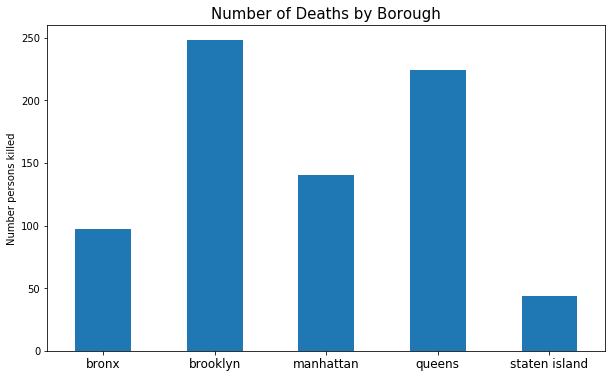

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
clean_nyc1.groupby('borough').persons_killed.sum().plot(kind='bar', figsize=(10, 6))
plt.ylabel('Number persons killed')
plt.title('Number of Deaths by Borough', fontsize=15)
plt.xticks(rotation=0, fontsize='large')
plt.xlabel(' ')

persons_killed1 = clean_nyc1.groupby('borough').persons_killed.sum().reset_index()
persons_killed1 ['sum'] = persons_killed1['persons_killed'].cumsum()

It looks like Brooklyn and Queens have the highest death counts, while Staten Island has the lowest. Interesting.
<br><div style="text-align: right">[Visualization Index](#Visualizations)</div>

## Number of Crashes by Hour  <a id='Crashes_by_hour'></a>

Let's see the mean of crashes by hour. We are interested in seeing the percentage rate of crashes for each hour. We want to see this information hourly to get a better general idea. We will use the `persons_killed` column and it will count all the rows with or without deaths or injuries, so we will be able to see the number of crashes by hour.

Text(0.5, 0, 'time')

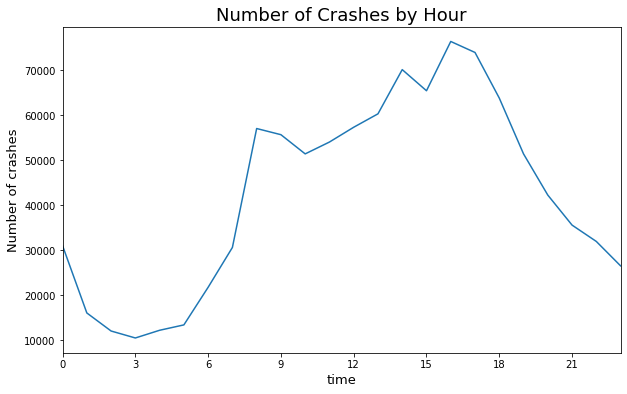

In [83]:
clean_nyc1.groupby(clean_nyc1.hour).persons_killed.count().plot(figsize=(10, 6))
plt.title('Number of Crashes by Hour', fontsize=18)
plt.ylabel('Number of crashes', fontsize=13)
plt.xticks(np.arange(0, 24, step=3))
plt.xlabel('time', fontsize=13)

It looks like the number of deaths go up between 14:00 and 17:00. They decrease between 2:00 and 7:00, while most people are sleeping.

Let's see when the accidents, in which more than one person die, tend to occur.

In [ ]:
# Please use google colab to see the visualization. 
# The link to the google colab of this file can be found at the top of the README.md file

fig = px.scatter (clean_nyc1, x= 'persons_killed', y= 'hour')
fig.show()

The collisions that result with more than one persons death tend to occur between 22:00 and 04:00.

<br><div style="text-align: right">[Visualization Index](#Visualizations)</div>
## Number of Crashes by Season <a id='accidents_by_season'></a>
Let's see the number of car crashes by season.

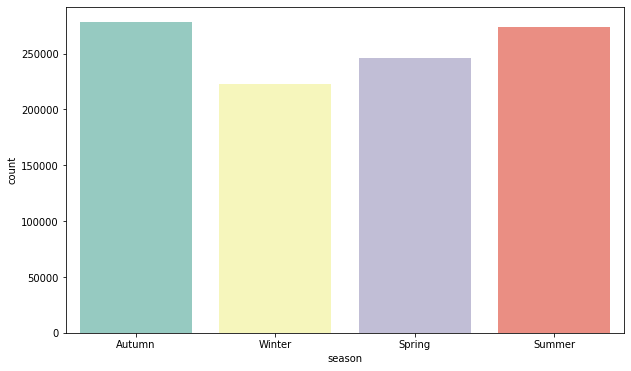

In [85]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x='season', data=clean_nyc1, palette='Set3')

Autumn and Summer have higher number of accidents compared to Spring and Winter.
<br><div style="text-align: right">[Visualization Index](#Visualizations)</div>
## Fatal Car Crash Locations <a id='car_crash_locations'></a>
We will have to prepare a new dataframe with the latitude and longitude values, before this can work. We'll also include other columns we may want to display in the visualization in some way, shape, or form.

In [86]:
crash_locations = clean_nyc1[['borough', 'crash_date', 'latitude' ,'longitude','persons_killed',
                           'cyclist_killed', 'pedestrians_killed','motorist_killed']].copy()
crash_locations.head()

,borough,crash_date,latitude,longitude,persons_killed,cyclist_killed,pedestrians_killed,motorist_killed
0,NaN,2019-10-16,40.742540,-73.82631,0.0,0,0,0
2,manhattan,2019-10-25,40.725200,-73.98706,0.0,0,0,0
3,NaN,2019-11-08,NaN,NaN,0.0,0,0,0
4,NaN,2019-10-16,40.662060,-73.94277,0.0,0,0,0
7,brooklyn,2019-10-21,40.625008,-74.03043,0.0,0,0,0


The first thing we will do is remove any non-fatal rows. To do so, we must first change the `persons_killed` column values from float to integer. 

In [87]:
crash_locations.dropna(subset = ['persons_killed'], how='all', inplace=True)
crash_locations['persons_killed'] = crash_locations.persons_killed.astype(int)
crash_locations.head()

,borough,crash_date,latitude,longitude,persons_killed,cyclist_killed,pedestrians_killed,motorist_killed
0,NaN,2019-10-16,40.742540,-73.82631,0,0,0,0
2,manhattan,2019-10-25,40.725200,-73.98706,0,0,0,0
3,NaN,2019-11-08,NaN,NaN,0,0,0,0
4,NaN,2019-10-16,40.662060,-73.94277,0,0,0,0
7,brooklyn,2019-10-21,40.625008,-74.03043,0,0,0,0


Much better. Now to drop the rows.

In [88]:
crash_locations = crash_locations[crash_locations.persons_killed != 0].reset_index()
crash_locations.head()

,index,borough,crash_date,latitude,longitude,persons_killed,cyclist_killed,pedestrians_killed,motorist_killed
0,6040,brooklyn,2019-10-30,40.609400,-73.967674,1,1,0,0
1,8820,NaN,2019-10-20,40.661156,-73.871010,1,0,0,1
2,11462,brooklyn,2019-10-29,40.600230,-73.995600,1,0,1,0
3,12575,brooklyn,2019-11-02,40.698643,-73.946970,1,0,0,1
4,12673,manhattan,2019-11-07,40.755950,-73.990740,1,0,1,0


Let's take a look to see if we can clean up this dataframe anymore.

In [89]:
crash_locations.shape

(1135, 9)

In [90]:
crash_locations.describe()

,index,latitude,longitude,persons_killed,cyclist_killed,pedestrians_killed,motorist_killed
count,1.135000e+03,991.000000,991.000000,1135.000000,1135.000000,1135.000000,1135.000000
mean,7.767048e+05,40.679146,-73.840964,1.051982,0.087225,0.459031,0.504846
std,4.630874e+05,1.296307,2.349798,0.343667,0.285395,0.534395,0.593708
min,6.040000e+03,0.000000,-74.236680,1.000000,0.000000,0.000000,0.000000
25%,3.570770e+05,40.659408,-73.966105,1.000000,0.000000,0.000000,0.000000
50%,7.534270e+05,40.717926,-73.917965,1.000000,0.000000,0.000000,0.000000
75%,1.163232e+06,40.774848,-73.858155,1.000000,0.000000,1.000000,1.000000
max,1.618487e+06,40.906340,0.000000,8.000000,2.000000,6.000000,5.000000


It looks like we have 1127 rows, and we have missing lat/long values. For our purposes, we will drop those values now. There may be other ways to recover the data, or an approximation thereof, but it is beyond the scope of this notebook.

In [91]:
crash_locations.dropna(subset = ['latitude'], how='all', inplace=True)
crash_locations.dropna(subset = ['longitude'], how='all', inplace=True)
crash_locations.describe()

,index,latitude,longitude,persons_killed,cyclist_killed,pedestrians_killed,motorist_killed
count,9.910000e+02,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,7.585536e+05,40.679146,-73.840964,1.056509,0.086781,0.476287,0.492432
std,4.637440e+05,1.296307,2.349798,0.363534,0.285220,0.540476,0.601088
min,6.040000e+03,0.000000,-74.236680,1.000000,0.000000,0.000000,0.000000
25%,3.419815e+05,40.659408,-73.966105,1.000000,0.000000,0.000000,0.000000
50%,7.259100e+05,40.717926,-73.917965,1.000000,0.000000,0.000000,0.000000
75%,1.147637e+06,40.774848,-73.858155,1.000000,0.000000,1.000000,1.000000
max,1.618487e+06,40.906340,0.000000,8.000000,2.000000,6.000000,5.000000


Finally, we can map these values.

In [ ]:
# Please use google colab to see the visualization. 
# The link to the google colab of this file can be found at the top of the README.md file

import plotly.express as px

fig = px.scatter_mapbox(crash_locations, lat='latitude', lon='longitude',
                        size = "persons_killed",
                        hover_name="persons_killed",
                        hover_data=["pedestrians_killed", "cyclist_killed", "motorist_killed"],
                        color="persons_killed",
                        range_color=[1,8],
                        opacity=0.5,
                        width =850,
                        zoom=9,
                       )
fig.update_layout(title='Fatal Car Crash Locations')
fig.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=286)
fig

This looks pretty scary! These deaths represent pedestrians, cyclists, and motorists. It is hard to find roads where people have not been killed by cars in NYC!

Though we must remember that this map represents deaths over nearly a decade.

<br><div style="text-align: right">[Visualization Index](#Visualizations)</div>
## Contributing Factors to Crash Fatalities <a id='Factor_Bar_Plot'></a>
We will use the 'value_counts' function to see how frequently contributing factor values appear in the data.

In [93]:
clean_nyc1['contributing_factor_vehicle_1'].value_counts()

traffic recklessness              451938
driver inattention/distraction    368097
road defects                       60776
outside error                      57031
illness                            47246
car defects                        19351
drugs (illegal)                    16272
Name: contributing_factor_vehicle_1, dtype: int64

For now, we'll just analyze the first contributing factor to get a general sense of the data. Let's look into the causes of fatal car crashes. We'll start by creating a new dataframe that groups those causes.

In [94]:
counted_lethal_crash_factors = clean_nyc1.groupby('contributing_factor_vehicle_1').persons_killed.sum().reset_index().sort_values("persons_killed", ascending = False)
counted_lethal_crash_factors.head()

,contributing_factor_vehicle_1,persons_killed
6,traffic recklessness,454.0
1,driver inattention/distraction,289.0
5,road defects,201.0
3,illness,99.0
4,outside error,73.0


Finally, let's drop 0's if we have any.

In [95]:
counted_lethal_crash_factors = counted_lethal_crash_factors[counted_lethal_crash_factors.persons_killed != 0]
counted_lethal_crash_factors.tail()

,contributing_factor_vehicle_1,persons_killed
5,road defects,201.0
3,illness,99.0
4,outside error,73.0
2,drugs (illegal),72.0
0,car defects,6.0


Great. Now let's visualize fatal crash causes in NYC.

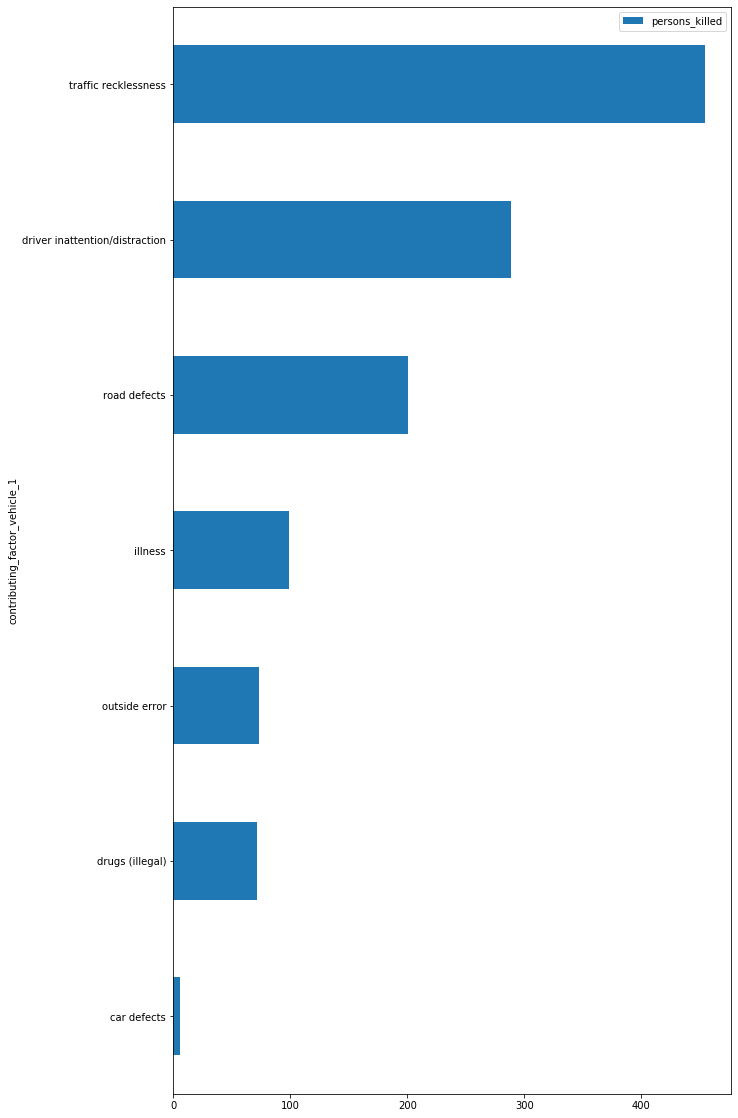

In [96]:
counted_lethal_crash_factors.plot.barh("contributing_factor_vehicle_1", 
                                      "persons_killed",
                                      figsize = (10,20)
                                      ).invert_yaxis()

This horizontal bar chart gives a slightly better sense of the data, that fatal accidents are mostly caused by traffic recklessness.

This is of course only looking at fatal accidents, only at the first recorded cause, and the reports are likely not 100% reliable. However, if NYC's government wanted to do more to reduce fatalities, this is useful information.
<br><div style="text-align: right">[Visualization Index](#Visualizations)</div>
## Fatalities to Pedestrians vs Cyclists vs Motorists <a id='Fataity_Grouped_Series'></a>
We can plot the dataframes we created earlier using Seaborn, a library built to handle python data visualizations.

For this graph, we will overlay the rolling sum of fatalities (grouped by travel type) on the same graph, to get a sense of relative danger.

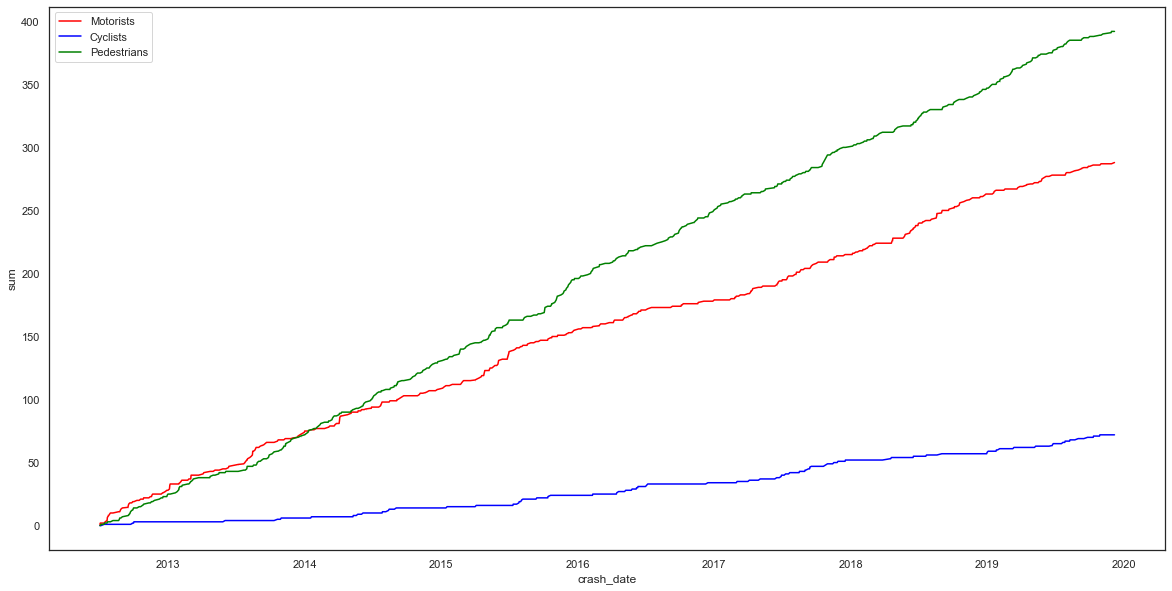

In [97]:
sns.set(style="white")

fig, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x='crash_date', y='sum', color = 'red', data=killed_motorists, ax=ax)
sns.lineplot( x='crash_date', y='sum', color = 'blue', data=killed_cyclist, ax=ax)
sns.lineplot( x='crash_date', y='sum', color = 'green', data=killed_pedestrians, ax=ax)
ax.legend(['Motorists', 'Cyclists', 'Pedestrians'], facecolor='w')

plt.show()

This is interesting. More pedestrians are killed than motorists by car crashes. I guess that is not entirely surprising, but it is disheartening.

This analysis lends itself well to comparing injury rates as well, which we would expect to be significantly higher.

Assuming there was more time, further analysis into the rates of change in the fatality set (to see if NYC is getting safer or more dangerous) would be manageable with another function over these data sets.
<br><div style="text-align: right">[Visualization Index](#Visualizations)</div>
## Fatal Crash Frequency Over Time <a id='Fatality_Time_Scatterplot'></a>
To visualize the data we need to refine our dataframe. We'll try to sort rows where fatalities occurred into a new dataframe, then we need to group by date and sum.

In [98]:
lethal_crashes = clean_nyc1[clean_nyc1['persons_killed'] > 0]
lethal_crashes.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour,season
6040,2019-10-30,2019-12-12 10:09:00,brooklyn,11230,40.609400,-73.967674,0.0,1.0,0,0,0,1,0,0,outside error,unspecified,suv,bike,10,Autumn
8820,2019-10-20,2019-12-12 21:07:00,NaN,nan,40.661156,-73.871010,0.0,1.0,0,0,0,0,0,1,traffic recklessness,unspecified,sedan,garbage or refuse,21,Autumn
11462,2019-10-29,2019-12-12 18:26:00,brooklyn,11214,40.600230,-73.995600,0.0,1.0,0,1,0,0,0,0,driver inattention/distraction,NaN,suv,NaN,18,Autumn
12575,2019-11-02,2019-12-12 23:13:00,brooklyn,11206,40.698643,-73.946970,0.0,1.0,0,0,0,0,0,1,traffic recklessness,unspecified,motorcycle,station wagon/sport utility vehicle,23,Autumn
12673,2019-11-07,2019-12-12 23:19:00,manhattan,10018,40.755950,-73.990740,0.0,1.0,0,1,0,0,0,0,driver inattention/distraction,NaN,taxi,NaN,23,Autumn


Now to group by `crash_date`... We are going to use a number of chained functions here. We are adding up the number of fatalities per day, and sorting chronologically.

Sidenote: We changed the format in the time column, accidentally adding today's date, but that will not have an impact on our analysis.

In [99]:
clean_nyc1.groupby('crash_date').persons_killed.sum().reset_index().head(20)

,crash_date,persons_killed
0,2012-07-01,0.0
1,2012-07-02,1.0
2,2012-07-03,1.0
3,2012-07-04,0.0
4,2012-07-05,1.0
5,2012-07-06,0.0
6,2012-07-07,0.0
7,2012-07-08,0.0
8,2012-07-09,0.0
9,2012-07-10,1.0


Next, we'll port this into a new dataframe with some other fields we are interested in for analysis, then try to use matplotlib.

In [100]:
counted_lethal_crashes = clean_nyc1.groupby(['crash_date','borough', 'contributing_factor_vehicle_1']).persons_killed.sum().reset_index()
counted_lethal_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69760 entries, 0 to 69759
Data columns (total 4 columns):
crash_date                       69760 non-null datetime64[ns]
borough                          69760 non-null object
contributing_factor_vehicle_1    69760 non-null object
persons_killed                   69760 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 2.1+ MB


Let's visualize it!

[Text(0, 0.5, 'Killed Count'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Number of people killed by motorists in NYC')]

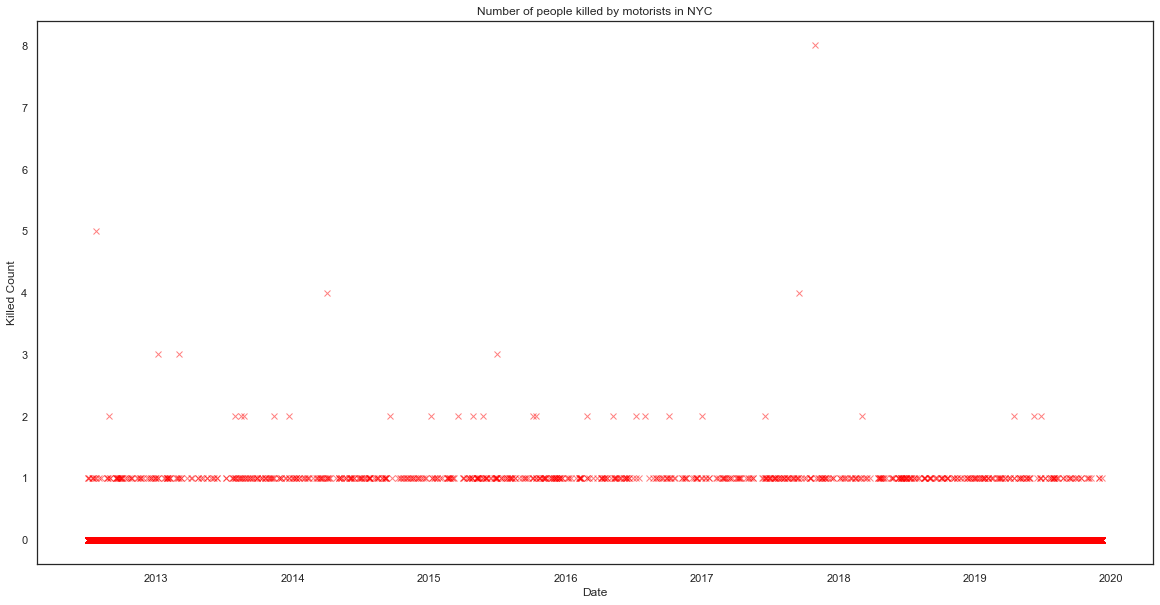

In [101]:
import matplotlib.pyplot as plt
plt.show() #makes graph space appear
fig, ax = plt.subplots(figsize=(20,10)) # Create the plot space upon which to plot the data
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling


x = counted_lethal_crashes['crash_date']
y = counted_lethal_crashes['persons_killed']

ax.plot(x,y,
        linestyle='',
        marker='x',
        alpha = 0.5,
        color='Red'
       )

ax.set(xlabel="Date",
       ylabel="Killed Count",
       title="Number of people killed by motorists in NYC") # Set title and labels for axes

We have successfully plotted the Car crash fatalities in NYC over time!

We can see from this that the majority of crashes have either 0 or 1 persons killed. Though there are some outliers. We could plug other columns into this chart, and see distributions of pedestrians, cyclists, motorists killed, but it will be easier and more visually appealing with pandas and seaborn. Here it is hard to get a precise view of the data, though it does help us know where to look.
<br><div style="text-align: right">[Visualization Index](#Visualizations)</div>
## Crash Factor Percentages in Queens <a id='queens_crash_causes'></a>
Let's check out our data for boroughs.

In [102]:
top_boroughs = clean_nyc1['borough'].value_counts()
top_boroughs

brooklyn         192032
queens           184451
manhattan        179293
bronx             86336
staten island     28093
Name: borough, dtype: int64

Now we'll look at the crashes to see what factor contributed first to the crash by each borough. We select out these columns and put into a dataframe to look at the information.

I would like to select out for the borough of Queens and look just at this neighborhood for crash data. So, I select only this variable from the borough column and make a dataframe for factor contributing to vehicle crash for neighborhood Queens. This comparison is for the first factor involved in the crash. 

In [103]:
borough_factor = clean_nyc1.loc[:, ['borough', 'contributing_factor_vehicle_1']]
queens_data = borough_factor[borough_factor.borough == 'queens']
queens_data.head()

,borough,contributing_factor_vehicle_1
8,queens,driver inattention/distraction
11,queens,traffic recklessness
13,queens,traffic recklessness
20,queens,traffic recklessness
21,queens,driver inattention/distraction


For this data, what are the numbers for each contributing factor. 

In [104]:
reason_counts = queens_data['contributing_factor_vehicle_1'].value_counts()
reason_counts

traffic recklessness              81446
driver inattention/distraction    69984
road defects                      12188
illness                            8867
outside error                      5575
drugs (illegal)                    3457
car defects                        2934
Name: contributing_factor_vehicle_1, dtype: int64

Now we will find the percentage contribution of each factor for the borough Queens and the first contributing factor involved in the crash to determine which factor had the greatest impact for this group. This will be expressed as a percentage of the total number of contributing factors. 

In [105]:
total_reason_counts = reason_counts.sum()
total_reason_counts

184451

In [106]:
reason_counts1 = reason_counts/total_reason_counts*100
reason_counts1

traffic recklessness              44.155900
driver inattention/distraction    37.941784
road defects                       6.607717
illness                            4.807239
outside error                      3.022483
drugs (illegal)                    1.874210
car defects                        1.590666
Name: contributing_factor_vehicle_1, dtype: float64

The greatest impact to crash was traffic recklessness, which is followed by driver inattention/distraction.

Text(0.5, 1.0, 'Percentage of Factors leading to crashes in Queens')

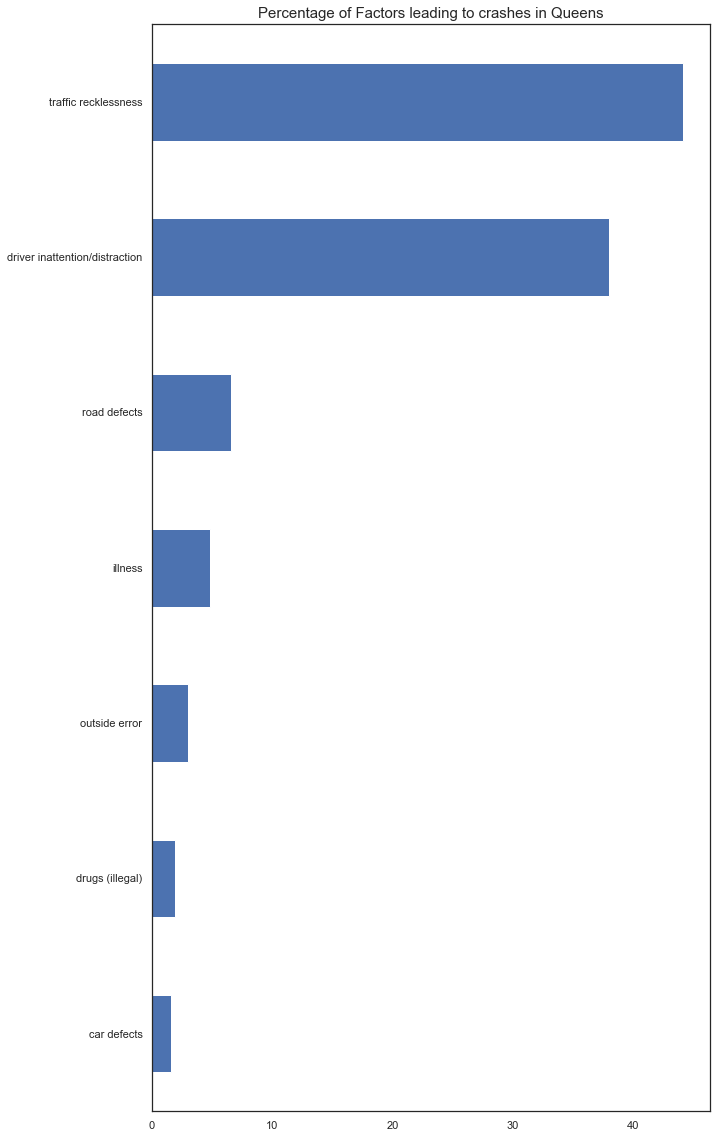

In [107]:
reason_counts1.plot.barh(figsize = (10,20)
                        ).invert_yaxis()
plt.title('Percentage of Factors leading to crashes in Queens', fontsize=15)

# <center> <br>[Beginning of the page](#Top)</center> <a id='Bottom'></a>